# Tutorial: Random Forest vs. Gradient Boosting: A Practical Comparison

Kita telah mempelajari dua arsitektur *ensemble* yang sangat kuat: Random Forest (berbasis Bagging) dan Gradient Boosting (berbasis Boosting). Keduanya menggunakan Decision Tree sebagai fondasi, tetapi dengan filosofi yang sangat berbeda.

Pertanyaan yang paling sering muncul di kalangan praktisi adalah: **"Mana yang harus saya gunakan, dan kapan?"**

Di notebook ini, kita akan melakukan perbandingan langsung, membahas kekuatan, kelemahan, dan aturan praktis untuk memilih model yang tepat untuk pekerjaan yang tepat.


---
### 1. Tujuan Pembelajaran

Di akhir notebook ini, Anda akan dapat:

* Merangkum perbedaan fundamental dalam cara kerja Random Forest dan Gradient Boosting.
* Membandingkan performa keduanya pada dataset yang sama.
* Mengidentifikasi kelebihan dan kekurangan masing-masing model.
* Mengembangkan aturan praktis untuk memutuskan kapan harus menggunakan Random Forest vs. Gradient Boosting.




---
### 2. Recap Cepat: Dua Filosofi yang Berbeda

* **Random Forest (Paralel & Demokrasi):**
  * Melatih banyak pohon secara **independen** pada subset data yang berbeda.
  * Setiap pohon memberikan "suara" yang setara.
  * Prediksi akhir adalah **rata-rata** dari semua suara.
  * **Tujuan Utama:** Mengurangi **varians** (overfitting) dengan merata-ratakan banyak model yang tidak stabil.

* **Gradient Boosting (Sekuensial & Belajar dari Kesalahan):**
  * Melatih pohon satu per satu, secara **berurutan**.
  * Setiap pohon baru difokuskan untuk **memperbaiki kesalahan** dari pohon-pohon sebelumnya.
  * Prediksi akhir adalah **penjumlahan berbobot** dari semua pohon.
  * **Tujuan Utama:** Mengurangi **bias** dengan secara perlahan-lahan membangun model yang semakin akurat.




---
### 3. Perbandingan Konseptual

| Fitur | Random Forest | Gradient Boosting |
| :--- | :--- | :--- |
| **Proses Pelatihan** | Paralel (bisa sangat cepat) | Sekuensial (lebih lambat) |
| **Sensitivitas thd. Hyperparameter** | **Rendah.** Cukup robust "langsung dari kotak". | **Tinggi.** Performa sangat bergantung pada tuning `n_estimators` & `learning_rate`. |
| **Kecenderungan Overfitting** | **Rendah.** Sulit untuk overfitting hanya dengan menambah pohon. | **Lebih Tinggi.** Bisa overfitting jika `n_estimators` terlalu banyak atau `learning_rate` terlalu tinggi. |
| **Kekuatan Utama** | Robust, mudah digunakan, baseline yang hebat. | Potensi untuk akurasi yang lebih tinggi. |
| **Kapan Digunakan?** | Titik awal yang sangat baik untuk hampir semua masalah. | Saat Anda ingin "memeras" performa maksimal dan bersedia untuk melakukan tuning. |




---
### 4. Setup dan Eksperimen

Mari kita bandingkan performa keduanya pada data non-linear kita. Kita akan menggunakan pengaturan default atau yang umum untuk melihat kinerja "langsung dari kotak" mereka.




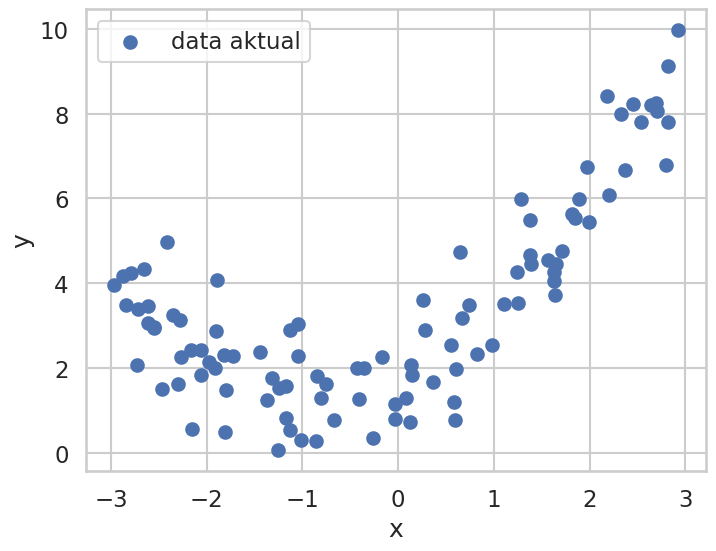

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Atur tema visual
sns.set_theme(style="whitegrid", context="talk")

# Data non-linear
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
y = y.ravel()

# Lakukan Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.figure(figsize=(8,6))
plt.scatter(X,y,label="data aktual")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


---
### 5. Implementasi & Evaluasi

Kita akan melatih kedua model dan mengevaluasi RMSE serta R² mereka pada data pengujian.



In [2]:
# Inisialisasi dan latih Random Forest
rf_reg = RandomForestRegressor(n_estimators=100,max_depth=3, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# Inisialisasi dan latih Gradient Boosting
gbrt = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbrt.fit(X_train, y_train)
y_pred_gbrt = gbrt.predict(X_test)

# Hitung metrik untuk Random Forest
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Hitung metrik untuk Gradient Boosting
rmse_gbrt = np.sqrt(mean_squared_error(y_test, y_pred_gbrt))
r2_gbrt = r2_score(y_test, y_pred_gbrt)

print("--- Performa pada Data Pengujian ---")
print(f"Random Forest -> RMSE: {rmse_rf:.4f}, R²: {r2_rf:.4f}")
print(f"Gradient Boosting -> RMSE: {rmse_gbrt:.4f}, R²: {r2_gbrt:.4f}")


--- Performa pada Data Pengujian ---
Random Forest -> RMSE: 0.8445, R²: 0.8395
Gradient Boosting -> RMSE: 0.8871, R²: 0.8229


**Analisis:**

Dalam kasus ini, dengan pengaturan yang cukup standar, performa keduanya sangat mirip dan sangat baik. Gradient Boosting sedikit lebih unggul dalam hal RMSE, yang seringkali terjadi. Namun, perbedaan ini mungkin tidak signifikan secara statistik tanpa *hyperparameter tuning* yang lebih mendalam.




---
### 6. Aturan Praktis: Kapan Menggunakan yang Mana?

#### **Mulai dengan `RandomForestRegressor` jika:**
* Anda membutuhkan **baseline yang kuat dan cepat**.
* Anda tidak punya banyak waktu untuk melakukan *hyperparameter tuning*.
* Anda khawatir tentang overfitting dan ingin model yang lebih "aman".
* Interpretasi model tidak terlalu krusial (meskipun kita akan belajar `feature_importance_` selanjutnya).

#### **Beralih ke `GradientBoostingRegressor` (atau variannya seperti XGBoost/LightGBM) jika:**
* **Performa adalah segalanya.** Anda sedang dalam kompetisi atau proyek di mana setiap desimal akurasi sangat berarti.
* Anda **bersedia menginvestasikan waktu** untuk melakukan *hyperparameter tuning* yang cermat (misalnya, menggunakan `GridSearchCV` atau `RandomizedSearchCV`).
* Anda memiliki dataset yang sangat besar dan kompleks.

**Alur Kerja yang Umum:**
1.  Mulai dengan Random Forest untuk mendapatkan baseline performa yang solid.
2.  Jika performanya sudah cukup baik untuk kebutuhan bisnis, Anda bisa berhenti di sini.
3.  Jika Anda perlu performa yang lebih tinggi, cobalah Gradient Boosting dan lakukan *tuning* pada `n_estimators`, `learning_rate`, dan `max_depth`.



### Kesimpulan

Random Forest dan Gradient Boosting adalah dua alat paling kuat dalam gudang senjata seorang praktisi *machine learning*.

* **Random Forest** adalah kuda kerja yang andal, cepat, dan mudah digunakan.
* **Gradient Boosting** adalah mobil balap presisi yang, dengan penyetelan yang tepat, dapat mencapai kecepatan tertinggi.

Mengetahui kapan harus menggunakan masing-masing adalah tanda dari seorang praktisi yang berpengalaman.

**Selanjutnya:**
Salah satu fitur terbaik dari kedua model *ensemble* ini adalah kemampuan mereka untuk memberi tahu kita fitur mana yang paling penting. Di subchapter berikutnya, kita akan membahas **Feature Importance**.
